<a id='top'></a>

# Does the English Premier League win at home more than the Rest of Europe?

## Introduction

Throughout this notebook to perform our Hypothesis Testing Analysis we will:

- [Make an Observation](#Observation)
- [Form a Hypothesis](#Hypothesis-Formulation)
- [Conduct an Experiment](#Experiment)
- [Analyze the Results of the Experiment](#Analysis)
- [Draw Conclusions](#Conclusions)

## Observation

The English Premier Leauge is widely considered the [best European Soccer League.](https://thetopflight.com/2019/05/10/premier-league-europes-dominant-force/) It is certainly the most lucrative soccer league in Europe with revenues reaching a [record £5.8 billion ($7.3 billion) in revenue during the 2017/18 season.](https://www.cnbc.com/2019/05/30/european-soccer-posts-record-revenues-as-epl-dominates-deloitte.html) This huge influx in money should mean an increase in winning, especially at home, with the English Premier League winning more at home than the rest of Europe.


## Hypothesis Formulation
We form our Hypothesis based off our observation:

### Null Hypothesis
>**$H_{0}$ : There is no difference in Home Win Percentage between the English Premier League and the rest of Europe**

$${\large \bar{x}} = \large \mu$$

### Alternate Hypothesis
>**$H_{a}$ : The English Premier League has a higher Home Win Percentage than the rest of Europe**

$${\large \bar{x}} > \large \mu$$


<a href="#top">Back to top</a>

## Experiment
This experiment comes from Hugo Mathien who [collected the data](https://www.kaggle.com/hugomathien/soccer) which is used in this notebook. This database contains over 25,000 matches collected from Season 2008 through 2016. The data we used contains:

|Table | Total Rows | Total Columns | Columns (edited for relevance)|
|----------|:-----------:|:----------:|----------|
Country | 11 | 2 | id, name
League | 11 | 3 | id, country_id, name
Match | 25979 | 115 | id, country_id, league_id, season, stage, date, match_api_id, home_team_api_id, away_team_api_id, home_team_goal, away_team_goal, (others)
Team | 299 | 5 | id, team_api_id, team_fifa_api_id, team_long_name, team_short_name

<br><br>
<a href="#top">Back to top</a>

## Analysis


<br><br>
<a href="#top">Back to top</a>

In [2]:
# Import Necessary Libraries
import sqlite3
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import scipy.stats as stats
import seaborn as sns

from functions import *

Begin with some Exploratory Data Analysis.

In [3]:
#Connecting our table using the SQL Database

sql_match = """
            SELECT Match.id, 
                    Country.name AS country_name, 
                    League.name AS league_name, 
                    season, 
                    stage, 
                    date,
                    HT.team_long_name AS  home_team,
                    AT.team_long_name AS away_team,
                    home_team_goal, 
                    away_team_goal                                        
            FROM Match
            JOIN Country on Country.id = Match.country_id
            JOIN League on League.id = Match.league_id
            LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
            LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
            ORDER by date
        ;"""

#Connecting to Database and Creating Table using a function from our functions.py file

df_matches = make_sql_frame(sql_match)
df_matches.head()

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
0,24559,Switzerland,Switzerland Super League,2008/2009,1,2008-07-18 00:00:00,BSC Young Boys,FC Basel,1,2
1,24560,Switzerland,Switzerland Super League,2008/2009,1,2008-07-19 00:00:00,FC Aarau,FC Sion,3,1
2,24561,Switzerland,Switzerland Super League,2008/2009,1,2008-07-20 00:00:00,FC Luzern,FC Vaduz,1,2
3,24562,Switzerland,Switzerland Super League,2008/2009,1,2008-07-20 00:00:00,Neuchâtel Xamax,FC Zürich,1,2
4,24613,Switzerland,Switzerland Super League,2008/2009,2,2008-07-23 00:00:00,FC Basel,Grasshopper Club Zürich,1,0


Need to check if there is any missing data in our tables.

In [4]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 10 columns):
id                25979 non-null int64
country_name      25979 non-null object
league_name       25979 non-null object
season            25979 non-null object
stage             25979 non-null int64
date              25979 non-null object
home_team         25979 non-null object
away_team         25979 non-null object
home_team_goal    25979 non-null int64
away_team_goal    25979 non-null int64
dtypes: int64(4), object(6)
memory usage: 2.0+ MB


No missing values, we can move on to finding our Win Percentages.

In [5]:
#Determining Results of all our Matches by checking goals scored for each Match

df_matches = add_results(df_matches)
df_matches.head()

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal,HomeWin,AwayWin,Draw
0,24559,Switzerland,Switzerland Super League,2008/2009,1,2008-07-18 00:00:00,BSC Young Boys,FC Basel,1,2,0,1,0
1,24560,Switzerland,Switzerland Super League,2008/2009,1,2008-07-19 00:00:00,FC Aarau,FC Sion,3,1,1,0,0
2,24561,Switzerland,Switzerland Super League,2008/2009,1,2008-07-20 00:00:00,FC Luzern,FC Vaduz,1,2,0,1,0
3,24562,Switzerland,Switzerland Super League,2008/2009,1,2008-07-20 00:00:00,Neuchâtel Xamax,FC Zürich,1,2,0,1,0
4,24613,Switzerland,Switzerland Super League,2008/2009,2,2008-07-23 00:00:00,FC Basel,Grasshopper Club Zürich,1,0,1,0,0


In [6]:
# Aggregating our data and organizing by Team

df_results = calc_wins(df_matches)
print(df_results.shape)
df_results.head()

(296, 14)


,TeamName,HomeWin,HomeLoss,HomeDraw,HomeWinPct,AwayLoss,AwayWin,AwayDraw,AwayWinPct,TotalWins,TotalLosses,TotalDraws,GamesPlayed,TotalWinPct
0,1. FC Kaiserslautern,8,15,11,0.235294,18,9,7,0.264706,17,33,18,68,0.250000
1,1. FC Köln,32,39,31,0.313725,51,28,23,0.274510,60,90,54,204,0.294118
2,1. FC Nürnberg,30,34,21,0.352941,44,19,22,0.223529,49,78,43,170,0.288235
3,1. FSV Mainz 05,55,35,29,0.462185,50,33,36,0.277311,88,85,65,238,0.369748
4,AC Ajaccio,16,22,19,0.280702,30,6,21,0.105263,22,52,40,114,0.192982


We now have all the data for all of the European matches, our Population Data. <br>
Let's find our sample only the data from the English Premier League.

In [7]:
#Finding only the Matches from the English Premier League in our df_matches table
df_england = df_matches.loc[df_matches['country_name'] == "England"]

#Aggregating all the wins/losses to calculate Win Percentages for our English Teams
df_england_wins = calc_wins(df_england)
df_england_wins.head()

,TeamName,HomeWin,HomeLoss,HomeDraw,HomeWinPct,AwayLoss,AwayWin,AwayDraw,AwayWinPct,TotalWins,TotalLosses,TotalDraws,GamesPlayed,TotalWinPct
0,Arsenal,97,21,34,0.638158,40,73,39,0.480263,170,61,73,304,0.559211
1,Aston Villa,45,57,50,0.296053,73,41,38,0.269737,86,130,88,304,0.282895
2,Birmingham City,14,7,17,0.368421,22,7,9,0.184211,21,29,26,76,0.276316
3,Blackburn Rovers,29,26,21,0.381579,45,13,18,0.171053,42,71,39,152,0.276316
4,Blackpool,5,9,5,0.263158,10,5,4,0.263158,10,19,9,38,0.263158


We have our population and sample data, the win percentages of all European games and just those of England respectively.
<br><br><br>
Let's look at the distribution of our data. We'll start by looking at European home win percentages.

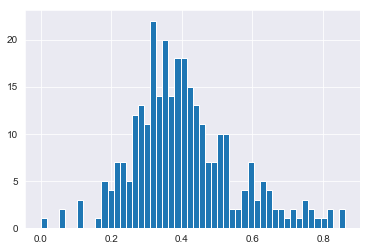

In [8]:
sns.set_style('darkgrid')
plt.hist(df_results['HomeWinPct'], bins =50)
plt.show()

This looks pretty normally distributed, we can sample from this data and create a more normal distribution.

In [9]:
match_sample = [sample_mean(df_results['HomeWinPct'], 200) for i in range(20000)]

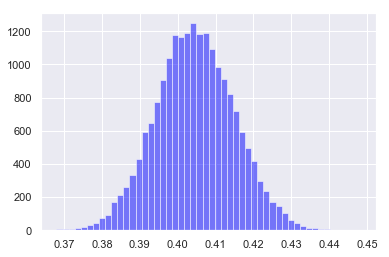

In [10]:
plt.figure()
sns.set()
plt.hist(match_sample, bins =50, alpha =.5, color = 'blue')
plt.show()

Let's check the accuracy of our sample by comparing the mean of our population vs the mean of this population sample.

In [11]:
pop_mean = np.mean(match_sample)
print("Population Mean: ", df_results.HomeWinPct.mean())
print("Sample Mean: ", pop_mean)
acc = 1 - (np.abs(np.mean(match_sample) - df_results.HomeWinPct.mean()) / df_results.HomeWinPct.mean())
print("Accuracy: ", np.round(acc*100,2))

Population Mean:  0.40447319463900916
Sample Mean:  0.4045374089125141
Accuracy:  99.98


Let's look at the data from the English Premier League next.

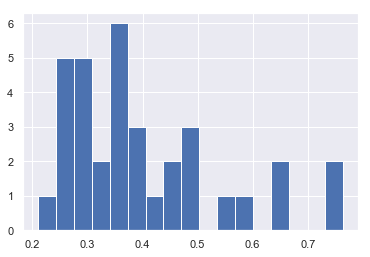

In [12]:
sns.set_style('darkgrid')
plt.hist(df_england_wins['HomeWinPct'], bins =17)
plt.show()

Let's do the same thing we did with our Population (European) data for our Sample (England) data and sample it to create a more normal distribution.

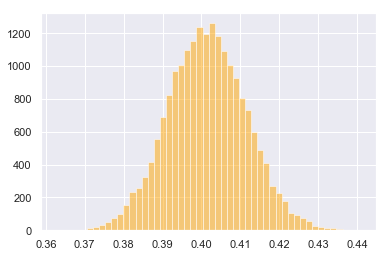

In [13]:
england_sample = [sample_mean(df_england_wins['HomeWinPct'], 200) for i in range(20000)]
plt.hist(england_sample, bins=50, alpha = .5, color = 'orange')
plt.show()

We'll check the accuracy as well to make sure our sample is an accurate representation

In [14]:
print("Population Mean: ", df_england_wins.HomeWinPct.mean())
print("Sample Mean: ", np.mean(england_sample))
acc_2 = 1 - (np.abs(np.mean(england_sample) - df_england_wins.HomeWinPct.mean()) / df_england_wins.HomeWinPct.mean())
print("Accuracy: ", np.round(acc_2*100,2))

Population Mean:  0.40140793159369015
Sample Mean:  0.40141938939536337
Accuracy:  100.0


Now that we have our two distributions, our sample sizes are pretty small so let's do a t-test.
<br>
<br>
We'll begin by find our t-critical value using the scipy.stats library

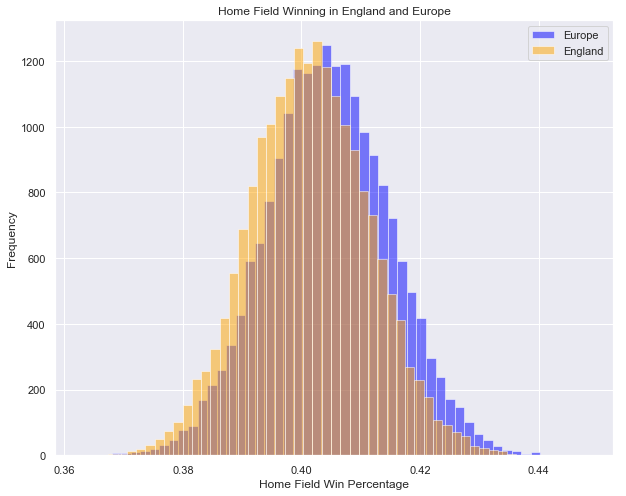

In [21]:
plt.figure(figsize = (10,8))
plt.xlabel('Home Field Win Percentage')
plt.ylabel('Frequency')
plt.title('Home Field Winning in England and Europe')
plt.hist(match_sample, bins =50, alpha =.5, color = 'blue')
plt.hist(england_sample, bins=50, alpha = .5, color = 'orange')
plt.legend(['Europe', 'England'])
plt.show()


In [16]:
#t-test
#t critical value for 5% alpha
t_crit_ = np.round(stats.t.ppf(1 - 0.05, df =295),3)
t_crit_

1.65

Next we'll calculate our t-value using the following formula:
$$t = \frac{\bar{x}-\mu}{\frac{s}{\sqrt{n}}}$$

In [15]:
t_value = (np.mean(england_sample) - pop_mean)/(np.std(england_sample) / np.sqrt(len(england_sample)))
t_value

-10.472218490507954

In [16]:
t_value_ = stats.ttest_1samp(a = england_sample, popmean = pop_mean)
t_value_

Ttest_1sampResult(statistic=-10.471956681773042, pvalue=1.3536182994035985e-25)

Our t-value is less than our critical t value. This means we __*fail to reject our Null Hypothesis*__

What about the rest of the European Leagues? Do any of those leagues win more than the average home win percentage in Europe?
<br><br><br>
Let's being by creating a dataFrame with league names corresponding to each League

In [17]:
#Going to make a new SQL query to our database to get League Names and Countries

sql_league = """
            SELECT L.name as LeagueName,
            C.name as CountryName
            FROM League as L
            JOIN Country as C
            ON C.id = L.country_id
            ;"""
df_league = make_sql_frame(sql_league)
df_league.head()

,LeagueName,CountryName
0,Belgium Jupiler League,Belgium
1,England Premier League,England
2,France Ligue 1,France
3,Germany 1. Bundesliga,Germany
4,Italy Serie A,Italy


Going to convert these League Names and Countries into Lists so we can make a Dictionary of all the Europeaon Leagues with their respective winning percentages

In [18]:
#Converting League Names and Country Names to lists

countries = df_league.CountryName.tolist()
leagues = df_league.LeagueName.tolist()

In [19]:
#Creating our Dictionary of Countries with Leagues

list_of_countries = []
for i in range(0,len(countries)):
    country_dict = {}
    country_dict['Name'] = countries[i]
    country_dict['League'] = leagues[i]
    list_of_countries.append(country_dict)

In [20]:
#Aggregating all the information about win percentages and adding to our dictionary

for i in range(0,len(list_of_countries)):
    df = df_matches.loc[df_matches.country_name == list_of_countries[i]["Name"]]
    df_wins = calc_wins(df)
    list_of_countries[i]['TeamNames'] = df_wins.TeamName.tolist()
    list_of_countries[i]['HomeWinPct'] = df_wins.HomeWinPct.tolist()
    list_of_countries[i]['AwayWinPct'] = df_wins.AwayWinPct.tolist()
    list_of_countries[i]['TotalWinPct'] = df_wins.TotalWinPct.tolist()


In [108]:
for i in range(0,len(list_of_countries)):
    team_home_win = list_of_countries[i]['HomeWinPct']
    sample_size = len(team_home_win)
    team_sample = [sample_mean(team_home_win, 200) for i in range(20000)]
    print(list_of_countries[i]['League'])
    t_crit_ = np.round(stats.t.ppf(1 - 0.05, df = sample_size -1),3)
    t_value = (np.mean(team_home_win) - pop_mean)/(np.std(team_home_win) / np.sqrt(sample_size))
    if(t_value > t_crit_):
        print("reject the Null Hypothesis\n")
    
    else:
        print("Fail to reject the Null Hypothesis\n")
    
#     plt.hist(team_sample, bins =50)
plt.show()

Belgium Jupiler League
Fail to reject the Null Hypothesis

England Premier League
Fail to reject the Null Hypothesis

France Ligue 1
Fail to reject the Null Hypothesis

Germany 1. Bundesliga
Fail to reject the Null Hypothesis

Italy Serie A
Fail to reject the Null Hypothesis

Netherlands Eredivisie
Fail to reject the Null Hypothesis

Poland Ekstraklasa
Fail to reject the Null Hypothesis

Portugal Liga ZON Sagres
Fail to reject the Null Hypothesis

Scotland Premier League
Fail to reject the Null Hypothesis

Spain LIGA BBVA
Fail to reject the Null Hypothesis

Switzerland Super League
Fail to reject the Null Hypothesis



## Conclusions
We failed to reject the Null Hypothesis with a 95% certainty that the English Premier League does not have a statistically significant higher winning percentage at home than the rest of Europe. We checked the other European Leagues as well and they all fail to reject the null hypothesis as well.

These Hypothesis Tests lead me to believe that there is greater parity amongst the top leagues in European Soccer. The next approach may be to check amongst only the top teams in Europe, to see if the higher spending among the top flight in soccer yields any statistical significance

<br><br>
<a href="#top">Back to top</a>
